In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [3]:
import h5py

In [4]:
with h5py.File('data/genotype_minor/chr1', 'r') as f:
    X = f['data'][:]

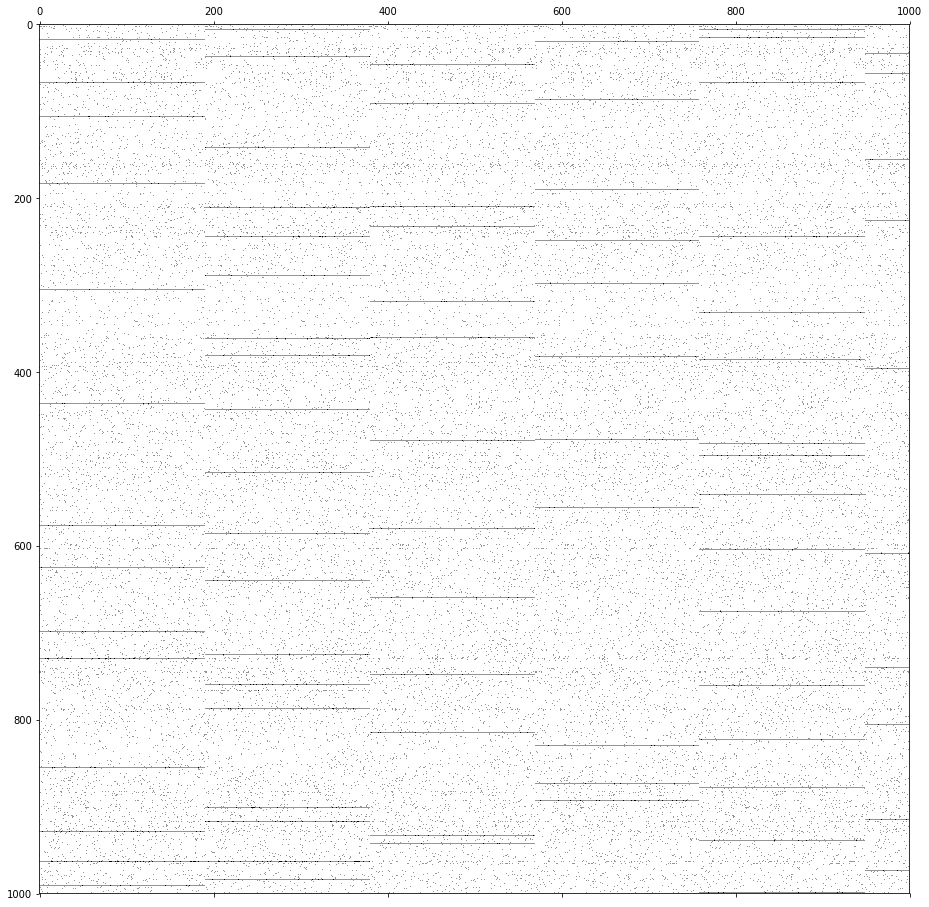

In [5]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.matshow(X[:1000, :1000], cmap=cm.Greys)

In [6]:
p = X.mean(axis=1).astype('float32')

In [93]:
p.max()

0.99549115

In [7]:
np.histogram(p, bins=50)

(array([36428, 97416, 60434, 38505, 21275, 12574,  7624,  4510,  2809,
         1776,  1245,   846,   642,   401,   267,   226,   163,    92,
          102,    59,    35,    46,    27,    24,    18,    17,    13,
           13,     9,     7,     7,     3,     6,     7,     3,     1,
            4,     3,     1,     0,     1,     3,     1,     3,     2,
            1,     0,     0,     0,     3]),
 array([  1.61030592e-04,   2.00676329e-02,   3.99742352e-02,
          5.98808376e-02,   7.97874399e-02,   9.96940422e-02,
          1.19600645e-01,   1.39507247e-01,   1.59413849e-01,
          1.79320452e-01,   1.99227054e-01,   2.19133656e-01,
          2.39040259e-01,   2.58946861e-01,   2.78853463e-01,
          2.98760066e-01,   3.18666668e-01,   3.38573270e-01,
          3.58479873e-01,   3.78386475e-01,   3.98293077e-01,
          4.18199680e-01,   4.38106282e-01,   4.58012884e-01,
          4.77919486e-01,   4.97826089e-01,   5.17732691e-01,
          5.37639293e-01,   5.57545896e-01

In [126]:
z = X.astype('float32') - p[:, np.newaxis]
z /= np.sqrt(np.mean(z*z, axis=1))[:, np.newaxis]

In [129]:
K = np.dot(z[:100000].T, z[:100000])/X.shape[1]

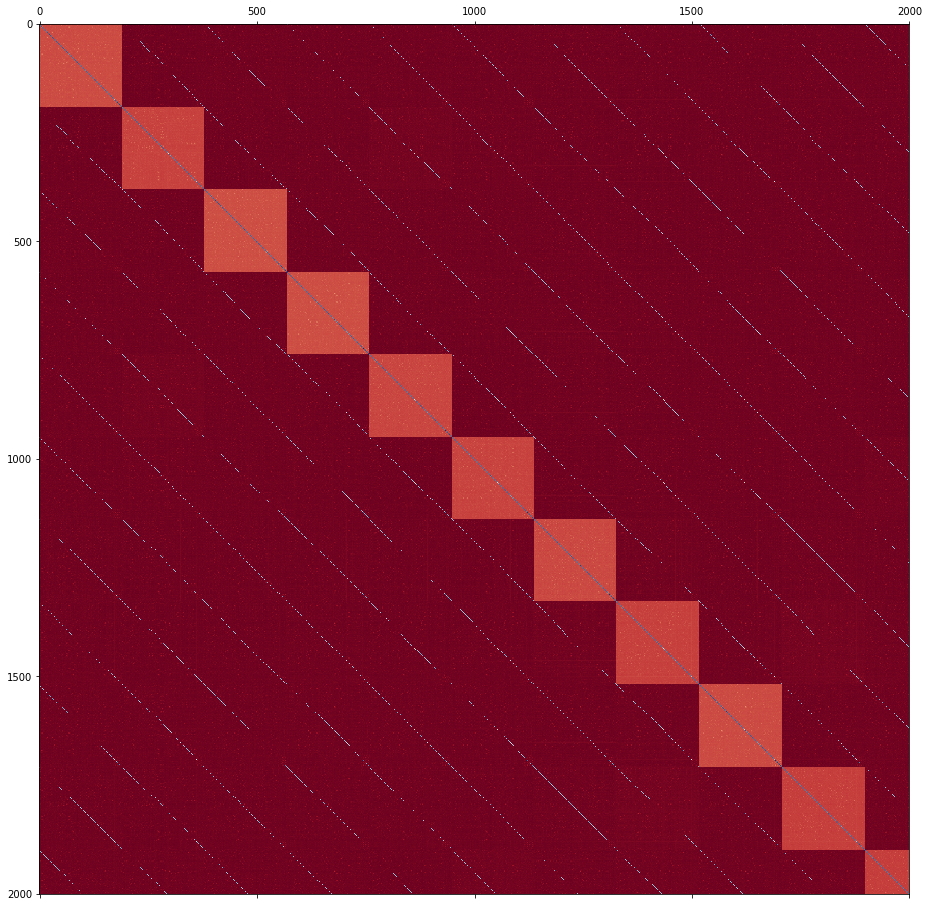

In [11]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.matshow(K[:2000, :2000], cmap=cm.RdBu)

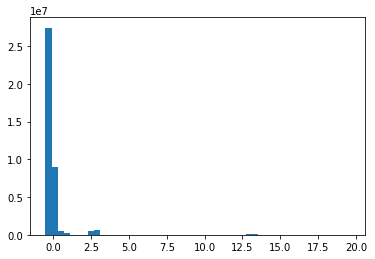

In [13]:
h = hist(K.flatten(), bins=50)

In [14]:
K2 = np.dot(z[100000:200000].T, z[100000:200000])

In [15]:
K2

array([[  1.59604206e+01,   3.04561615e+00,   3.00027466e+00, ...,
         -2.74923950e-01,   6.00638539e-02,  -2.02306822e-01],
       [  3.04561615e+00,   1.73340054e+01,   3.04415226e+00, ...,
         -1.37079224e-01,  -3.78103822e-01,  -2.89991945e-01],
       [  3.00027466e+00,   3.04415226e+00,   1.65927849e+01, ...,
         -2.29800135e-01,  -3.66823524e-01,   7.78870191e-03],
       ..., 
       [ -2.74923950e-01,  -1.37079224e-01,  -2.29800135e-01, ...,
          1.61755543e+01,   2.39489102e+00,   2.62947679e+00],
       [  6.00638539e-02,  -3.78103822e-01,  -3.66823524e-01, ...,
          2.39489102e+00,   1.63566856e+01,   2.43542695e+00],
       [ -2.02306822e-01,  -2.89991945e-01,   7.78870191e-03, ...,
          2.62947679e+00,   2.43542695e+00,   1.47074270e+01]], dtype=float32)

In [130]:
K

array([[ 16.83668518,   2.86739922,   2.82296205, ...,  -0.26643986,
         -0.18363863,  -0.13032748],
       [  2.86739922,  16.16645622,   3.04888296, ...,  -0.11567196,
         -0.1887379 ,  -0.0482836 ],
       [  2.82296205,   3.04888296,  16.81886482, ...,  -0.11105096,
         -0.23040585,   0.14048117],
       ..., 
       [ -0.26643986,  -0.11567196,  -0.11105096, ...,  16.0619545 ,
          2.56924391,   2.76415086],
       [ -0.18363863,  -0.1887379 ,  -0.23040585, ...,   2.56924391,
         15.73986435,   2.58156729],
       [ -0.13032748,  -0.0482836 ,   0.14048117, ...,   2.76415086,
          2.58156729,  16.40799713]], dtype=float32)

In [104]:
K - K2

array([[  1.41107244e-04,  -2.86978611e-05,  -2.85526330e-05, ...,
          1.36618837e-06,  -3.92435759e-05,   1.15908933e-05],
       [ -2.86978611e-05,  -1.88010046e-04,   7.62462150e-07, ...,
          3.44719228e-06,   3.04937057e-05,   3.89224442e-05],
       [ -2.85526330e-05,   7.62462150e-07,   3.64072621e-05, ...,
          1.91222789e-05,   2.19674293e-05,   2.13675576e-05],
       ..., 
       [  1.36618837e-06,   3.44719228e-06,   1.91222789e-05, ...,
         -1.82925723e-05,   2.80759123e-05,   2.16868648e-05],
       [ -3.92435759e-05,   3.04937057e-05,   2.19674293e-05, ...,
          2.80759123e-05,  -9.93269496e-05,   2.35331827e-05],
       [  1.15908933e-05,   3.89224442e-05,   2.13675576e-05, ...,
          2.16868648e-05,   2.35331827e-05,   2.73843063e-04]], dtype=float32)

In [17]:
eigvals, V = np.linalg.eigh(K)

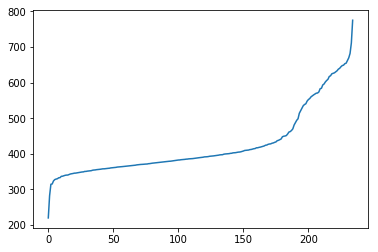

In [143]:
plot(eigvals[-235:])

In [54]:
X_pc = np.copy(V[:, -235:])

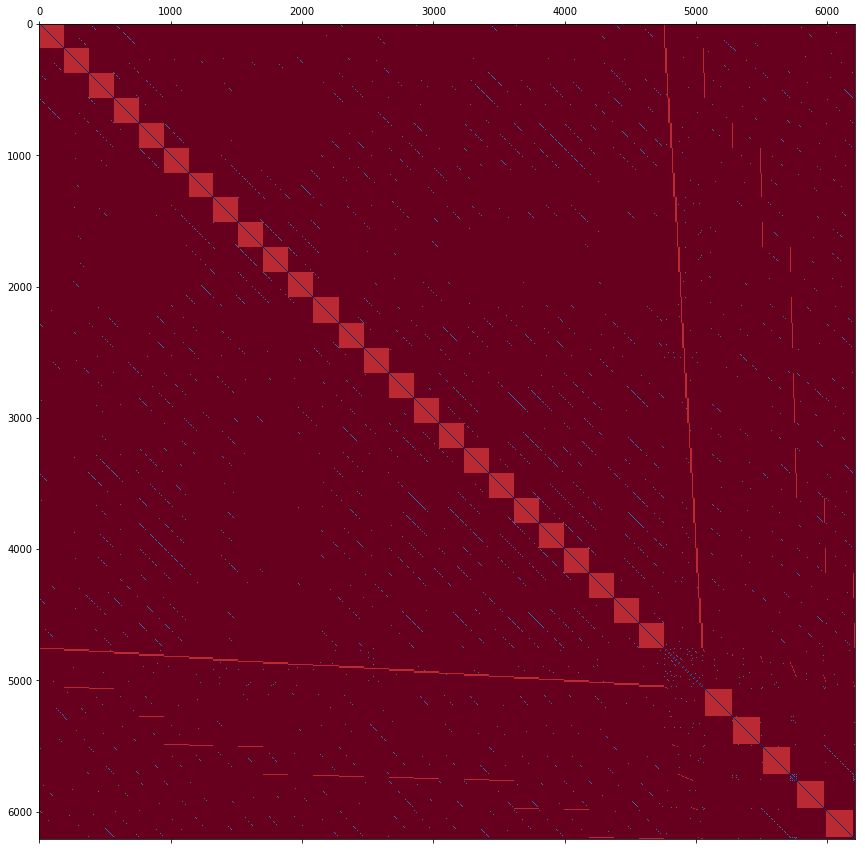

In [55]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(np.dot(X_pc, X_pc.T), cmap=cm.RdBu)

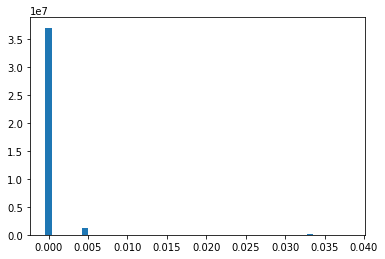

In [146]:
h = hist(np.dot(X_pc, X_pc.T).flatten(), bins=50)

In [62]:
np.abs(X_pc).argmax(axis=1)[:100]

array([ 10, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222, 222,  14,   7, 222, 222, 222,  32, 222, 222,  14,
       222, 222, 222, 222,  21, 222, 222, 222, 222, 222, 222, 222,   9,
       222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222,  18, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222, 222,  28, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222, 222, 222, 222, 222, 146, 222, 222, 222,   8, 222,
       222, 222, 222, 222,  25, 222, 222, 222, 222])

In [66]:
np.abs(X_pc).max(axis=1)

array([ 0.07526038,  0.06068476,  0.05512631, ...,  0.042298  ,
        0.04622249,  0.04184155], dtype=float32)

In [71]:
np.percentile(np.abs(X_pc), 90, axis=1)

array([ 0.01606375,  0.0209236 ,  0.02117765, ...,  0.01993267,
        0.02086003,  0.02149592])

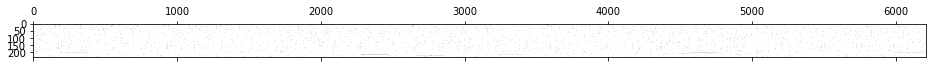

In [91]:
fig, ax = plt.subplots(figsize=(16, 20))
X_pc_clean = np.abs(np.copy(X_pc))
X_pc_clean[X_pc_clean < np.percentile(X_pc, 95, axis=1)[:, np.newaxis]] = 0
ax.matshow(np.abs(X_pc_clean[:, :]).T, cmap=cm.Greys)

In [92]:
p

array([ 0.03864734,  0.05797102,  0.04396135, ...,  0.14396136,
        0.08164251,  0.09178744], dtype=float32)

In [94]:
# average distance between SNPs
genomic_positions = {}
with h5py.File('data/genomic_positions', 'r') as f:
    for key in f.keys():
        genomic_positions[key] = f[key][:]

In [97]:
distance = genomic_positions['chr1'][1:] - genomic_positions['chr1'][:-1]

In [103]:
print(np.percentile(distance, 95))
print(np.percentile(distance, 75))
print(np.percentile(distance, 50))
print(np.percentile(distance, 25))

4633.0
871.0
211.0
67.0


In [114]:
def LD_r2(xa, xb):
    D = np.mean(xa*xb)
    pa = xa.mean()*0.5
    pb = xb.mean()*0.5
    return D*D/(pa*(1.0 - pa)*pb*(1.0 - pb))

In [122]:
LD_r2(X[5], X[10])

0.111856056038973

In [125]:
np.percentile(p, 99)

0.22190016508102417